## Pratik Kadam

### The Sparks Foundation 
### Task6 - Prediction using Decision Tree  Algorithm

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

#### importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df = pd.read_csv(r"D:\Spark Foundation Internship\Task6\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

#### Checking Null Values

In [3]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* No null values

#### Removing irrelavent column

In [4]:
df = df.drop(['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking Outliers

<AxesSubplot:>

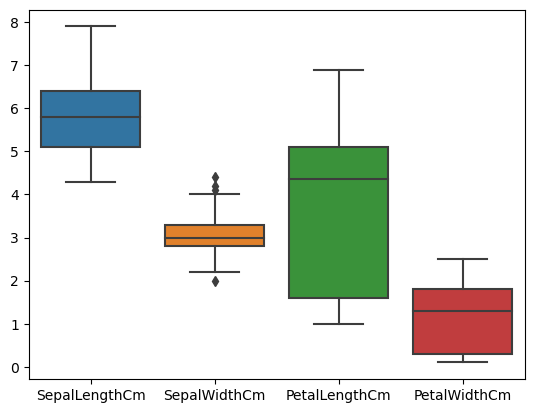

In [5]:
sns.boxplot(data=df)

#### Removing Outliers

In [6]:
# Winzoring technique 

for i in df:                 
    if df[i].dtypes in ("float64","int64"): 
        q1 = df[i].quantile(0.25) 
        q3 = df[i].quantile(0.75) 
        iqr = q3-q1 
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr
        df[i].clip(upper=ul,lower=ll,inplace=True)
        

* Outliers Removed

#### Columns Name :

In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Label encoding

In [9]:
number = df[df.select_dtypes(include=['integer','float']).columns.tolist()]
number.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
category = df[df.select_dtypes(include=['object']).columns.tolist()]
category.head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


In [11]:
from sklearn.preprocessing import LabelEncoder

category =category.apply(LabelEncoder().fit_transform)
category.head(3)

,Species
0,0
1,0
2,0


In [12]:
df_final = pd.concat([number,category],axis=1)
df_final.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting Dataset

In [13]:
from sklearn.model_selection import train_test_split

x = df_final.drop(['Species'],axis=1)
y = df_final[['Species']]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

In [14]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,3.0,1.4,0.2,0
23,5.1,3.3,1.7,0.5,0
25,5.0,3.0,1.6,0.2,0
38,4.4,3.0,1.3,0.2,0
124,6.7,3.3,5.7,2.1,2


### Model Building ( Decision Tree)

In [15]:

from sklearn import tree

dt = tree.DecisionTreeClassifier()  #by default it use Gini index for split


dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [16]:
independent_variable = list(train.columns[1:])
independent_variable

['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

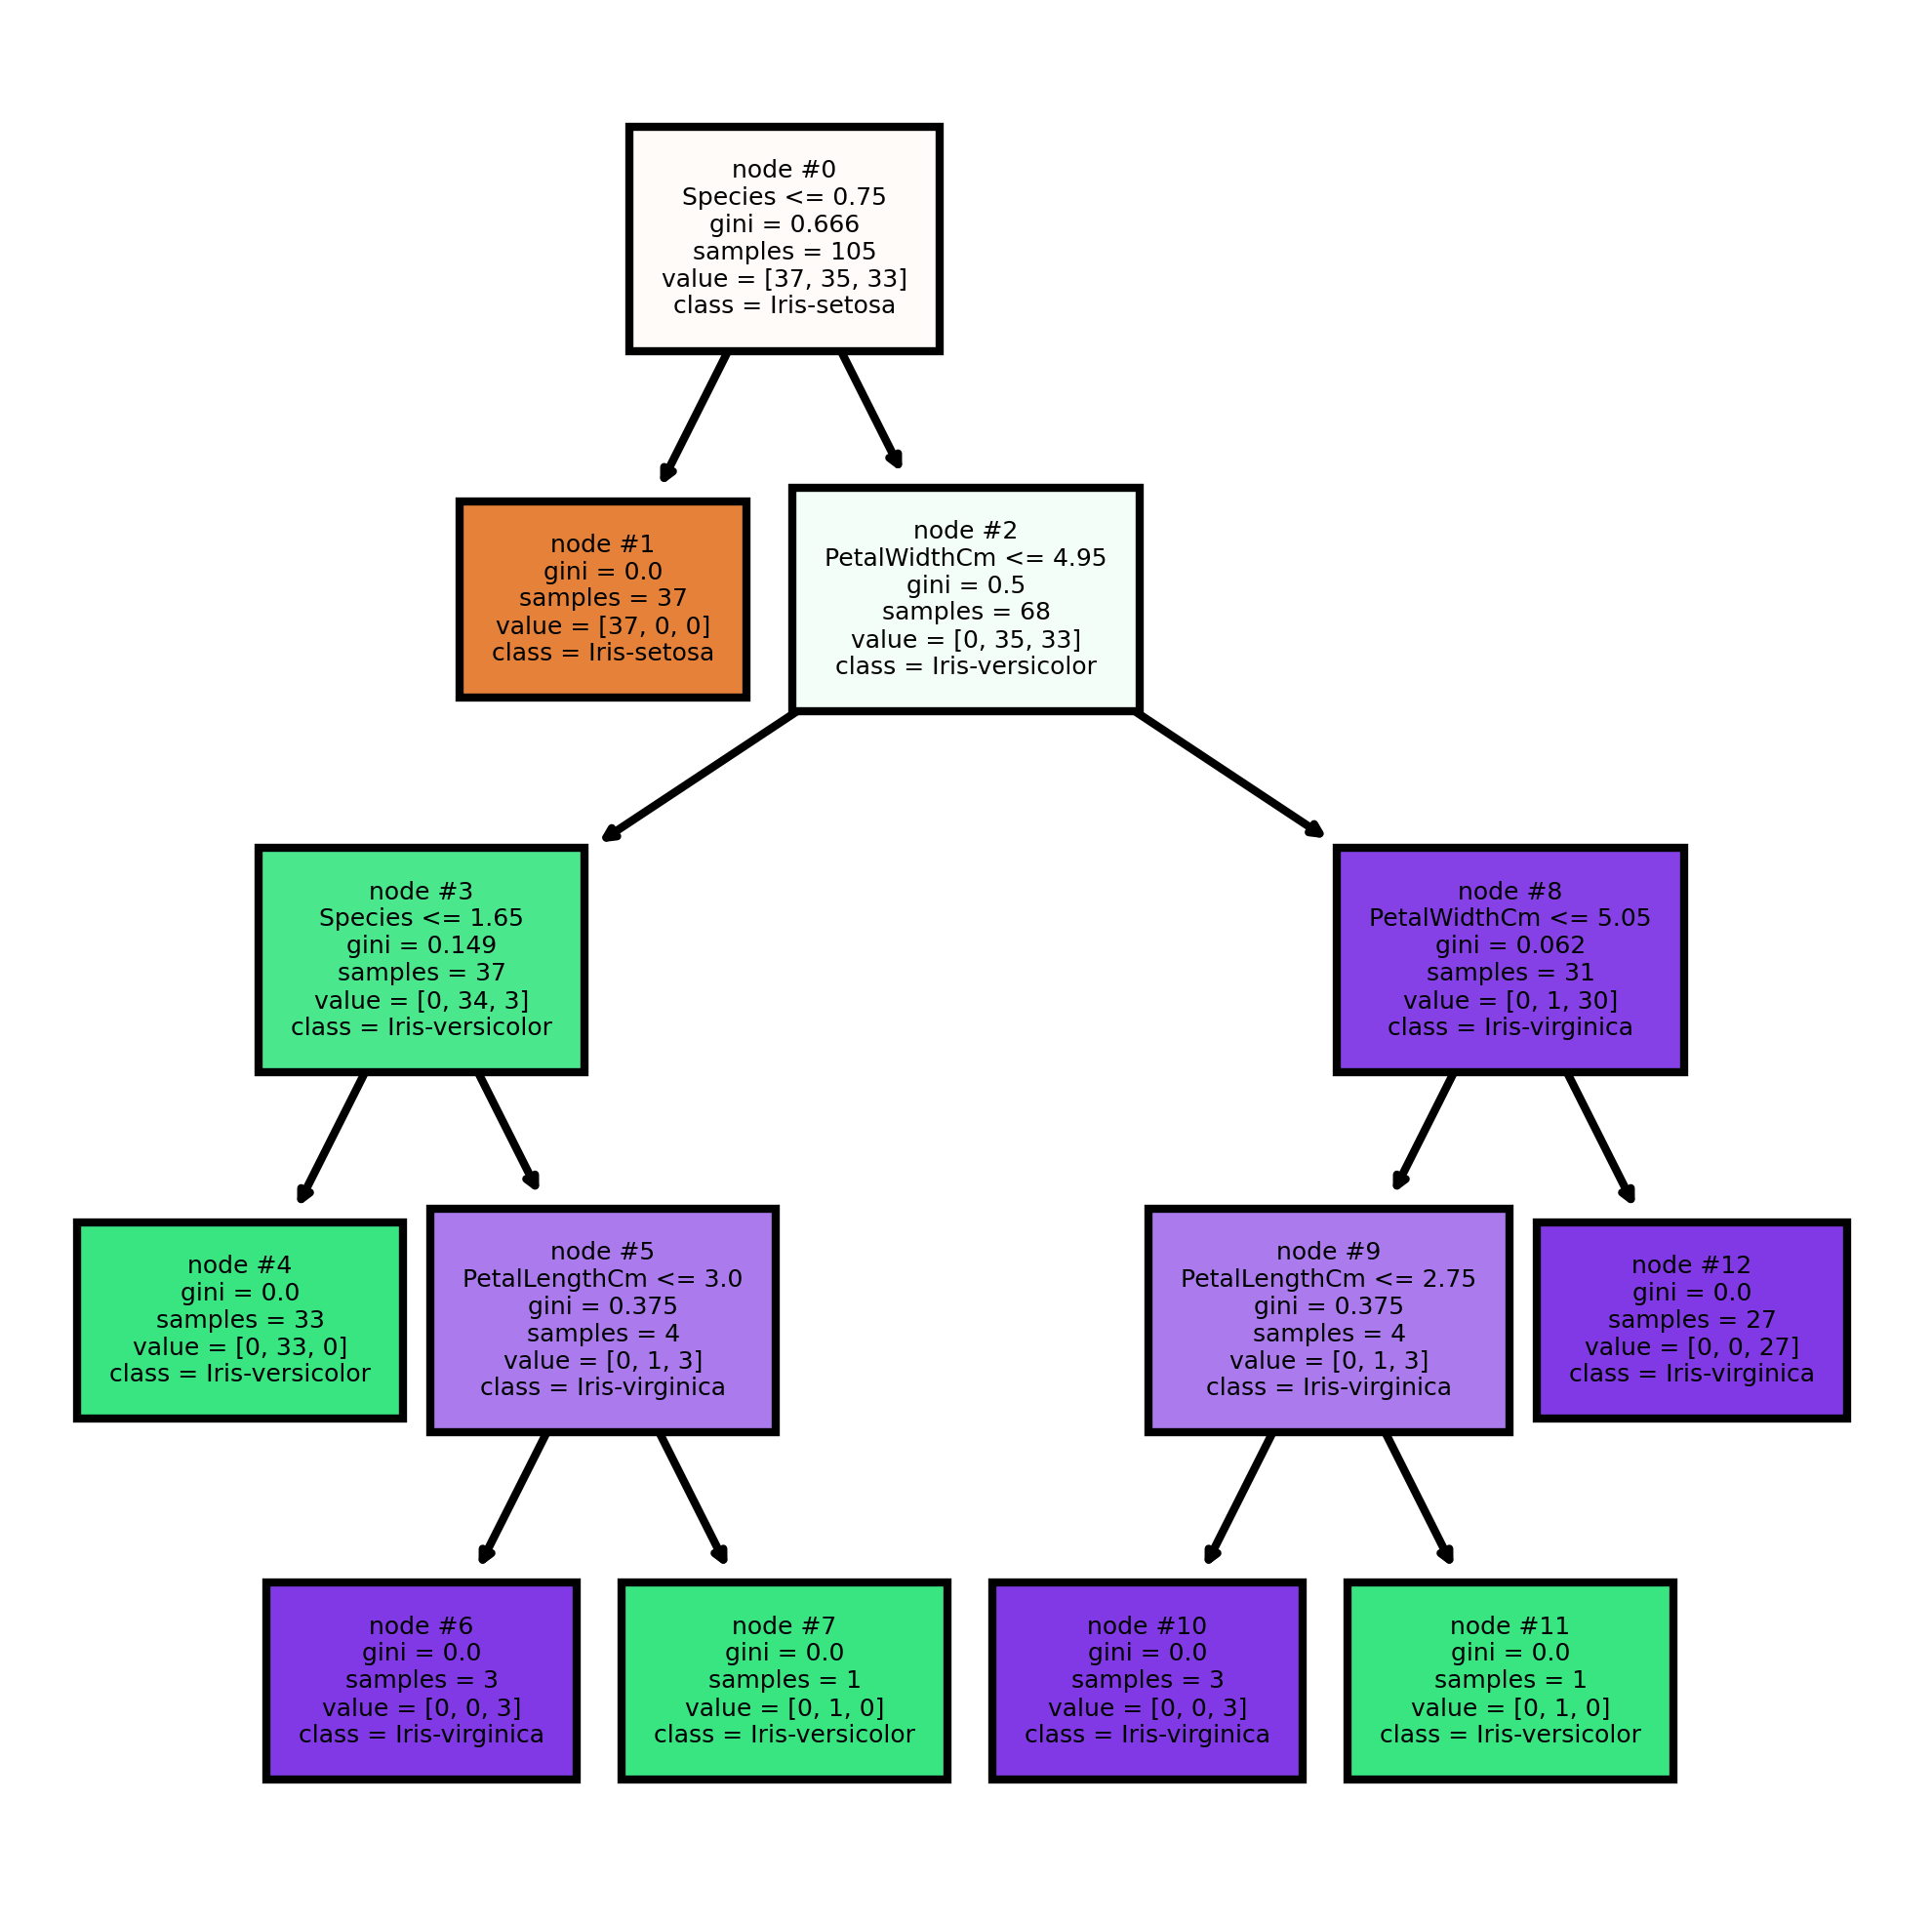

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  # array

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(dt,
               feature_names = independent_variable,  
               class_names = Species,
               filled = True,
              node_ids=True, 
              fontsize=3);

#### Prediction on Train dataset

In [18]:
train['Predicted']=dt.predict(X_train)  
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
1,4.9,3.0,1.4,0.2,0,0
23,5.1,3.3,1.7,0.5,0,0
25,5.0,3.0,1.6,0.2,0,0
38,4.4,3.0,1.3,0.2,0,0
124,6.7,3.3,5.7,2.1,2,2


#### Classification Report :

In [19]:
from sklearn.metrics import classification_report
print(classification_report(train['Species'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        33

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



#### Prediction on Test dataset

In [20]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
63,6.1,2.9,4.7,1.4,1
65,6.7,3.1,4.4,1.4,1
91,6.1,3.0,4.6,1.4,1
59,5.2,2.7,3.9,1.4,1
121,5.6,2.8,4.9,2.0,2


In [21]:
test['Predicted']=dt.predict(X_test)
test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
63,6.1,2.9,4.7,1.4,1,1
65,6.7,3.1,4.4,1.4,1,1
91,6.1,3.0,4.6,1.4,1,1
59,5.2,2.7,3.9,1.4,1,1
121,5.6,2.8,4.9,2.0,2,2


#### Classification Report :

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test['Species'], test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Result :
Accuracy of the model is

 * Train : 100%
 
 * Test : 98%
 
* The accuracy of train is 1 or 100% since i took all the 4 features of the iris dataset.

### End 